## Media de una muestra aleatoria

Tomamos una muestra aleatoria de una variable distribuida uniformemente, y calculamos su media:

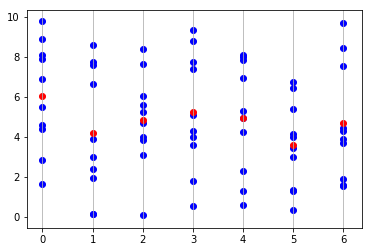

In [42]:
import numpy as np
from scipy.stats import uniform
import pylab as plt
import math
import seaborn as sns

n = 10 # sample size
a = 0  # min
b = 10 # max

for i in range(7):
    data_uniform = uniform.rvs(size=n, loc=a, scale=b)
    mean = np.mean(data_uniform)
    
    plt.scatter([i for _ in range(len(data_uniform))], data_uniform, color='blue')
    plt.scatter(i, mean, color='red')

plt.grid(axis='x')
plt.show()

Para cada vertical se ha elegido una muestra aleatoria de 10 puntos azules (con distribución uniforme). Los puntos rojos muestran la media de los puntos azules. 

Se ve claramente cómo la media queda "centrada", pero no es siempre la misma: tiene cierta variación. Es decir, **la media de una muestra aleatoria es también una variable aleatoria**.

## Distribución de la media de una muestra. Teorema del límite central

En la siguiente celda se realiza en mismo experimento 1000 veces, guardando las 1000 medias obtenidas. Luego se muestra la distribución de esas 1000 medias:

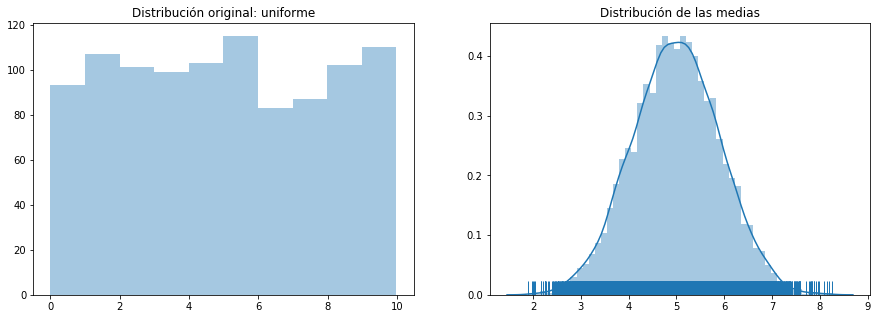

In [70]:
n = 10 # sample size
a = 0  # min
b = 10 # max

means = []
for i in range(10000):
    data_uniform = uniform.rvs(size=n, loc = a, scale=b)
    m = np.mean(data_uniform) # get mean
    means.append(m)

fig, ax =plt.subplots(1,2,figsize=(15, 5))

sns.distplot(uniform.rvs(size=1000, loc=a, scale=b), ax=ax[0], kde=False)
sns.distplot(means, kde=True, rug=True, ax=ax[1])

ax[0].set_title('Distribución original: uniforme')
ax[1].set_title('Distribución de las medias')
plt.show()

La distribución de las medias tiene la forma de una Normal!

https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central

<img src="img/tlc.png" alt="Drawing" style="width: 800px;"/>

Se resume en $ \bar{X} \sim  N(\mu, \frac{\sigma}{\sqrt{n}})$.

En nuestro caso, las variables $X_1, X_2, X_3 ...$ son los 10 elementos de cada muestra que hemos sacado. Son independientes$\checkmark$, son igualmente distribuidas$\checkmark$ (ya que las hemos sacado de la misma distribución uniforme). Y son variables aleatorias, porque en cada una de las 1000 veces, cada uno de esos 10 elementos toma un valor distinto. 

Por lo tanto se aplica el teorema: la media de los 10 elementos sigue una distribución $N(\mu, \frac{\sigma}{\sqrt{n}})$. La media y desviación típica las podemos calcular a partir de la muestra, o teóricamente:

Teóricamente: 

* Media: la distribución es uniforme entre 0 y 10, por tanto tiene media $\mu = 5$ 
* Varianza: la varianza de una distribución uniforme es $\sigma^2= \frac{1}{12}(b-a)^2$. En este caso: $ \sigma^2 = \frac{10^2}{12} = 8.33$, y la desviación tipica es entonces: $\sigma = \sqrt{8.33} = 2.89$ 

A partir de la muestra:


In [5]:
print( np.var(means, ddof=1) )
print( np.mean(means) )

0.8481320958617163
4.993066820190198


Por tanto, según el TLC tenemos: $$\bar{X} \sim N(5, \frac{2.89}{\sqrt{10}}) = N(5, 0.91) $$

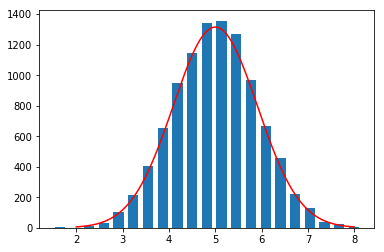

In [26]:
from scipy.stats import norm
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(2, 8, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, 3000*norm.pdf(x_axis,5,0.91), color='red') # TODO: ¿Por qué el 3000 anterior?
plt.bar(center, hist, align='center', width=width)
plt.show()

# Importante!

Lo guay aquí es que la distribución original no era normal! pero las medias sí siguen una distribución normal. Ésto es lo increíble del Teorema del límite Central    

# Otro caso más extremo

Partimos de una distribución exponencial:

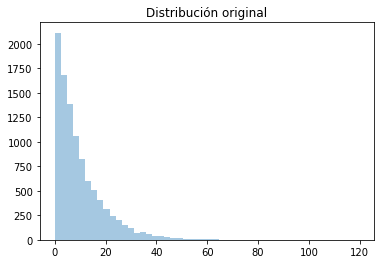

In [4]:
from scipy.stats import expon
import seaborn as sns
import pylab as plt
import numpy as np

N = 10000
a = 0
b = 10
data_expon = expon.rvs(size=N, loc=a, scale=b)
sns.distplot(data_expon, kde=False, rug=False)
plt.title('Distribución original')
plt.show()

Ahora cogemos, como antes, varias muestras de 10 elementos y calculamos su media:

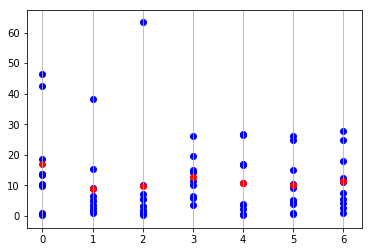

In [3]:
n = 10 # sample size
for i in range(7):
    data_expon = expon.rvs(size=n, loc=a, scale=b)
    mean = np.mean(data_expon)
    
    plt.scatter([i for _ in range(len(data_expon))], data_expon, color='blue')
    plt.scatter(i, mean, color='red')

plt.grid(axis='x')
plt.show()

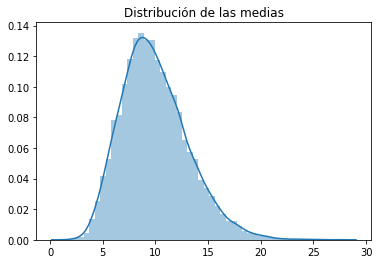

In [5]:
n = 10 # sample size
means = []
for i in range(10000):
    data_expon = expon.rvs(size=n, loc=a, scale=b)
    means.append( np.mean(data_expon) )

sns.distplot(means, kde=True, rug=False)
plt.title('Distribución de las medias')
plt.show()

Vemos que la media se distribuye mas o menos segun una Normal! Peeero no del todo, ya que n=10 es un n bajo. Vamos a coger muestras de tamaño n "suficientemente grande", como dice el teorema.


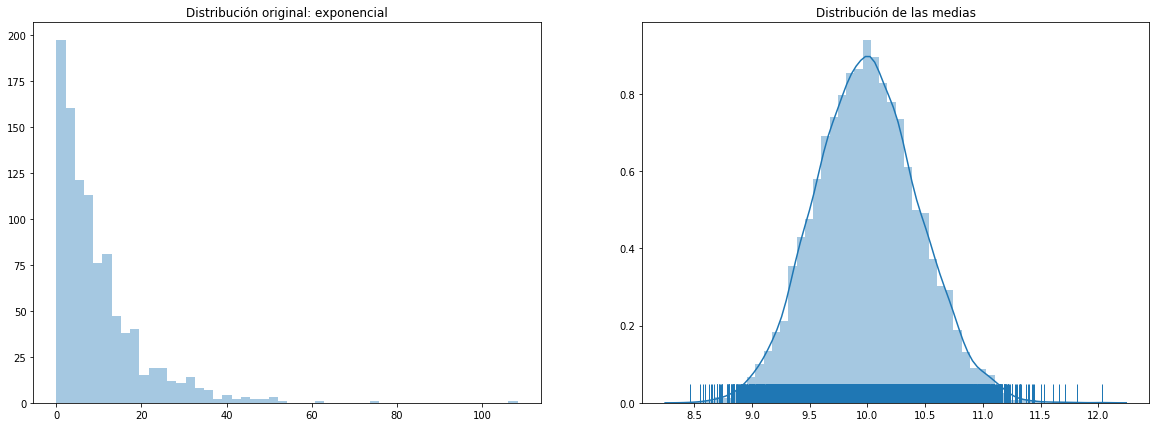

In [6]:
n = 500 # sample size
means = []
for i in range(10000):
    data_expon = expon.rvs(size=n, loc=a, scale=b)
    means.append( np.mean(data_expon) )


fig, ax =plt.subplots(1, 2, figsize=(20, 7))

sns.distplot(expon.rvs(size=1000, loc=a, scale=b), ax=ax[0], kde=False)
sns.distplot(means, kde=True, rug=True, ax=ax[1])

ax[0].set_title('Distribución original: exponencial')
ax[1].set_title('Distribución de las medias')
plt.show()

# Recursos

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

https://seaborn.pydata.org/tutorial/distributions.html